# Laboratorio Estadística Computacional 4

    - Pablo Mera K. 201773028-5
    - Paula Pérez M. 201603022-0
    - Anghelo Carvajal C. 201473062-4

In [1]:
import random 
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Students Performance in Exams.

#### 1. Escriba el algoritmo de boostrap para estimar la distribucion de la media de una asignatura utilizando R remuestreos generados a partir de una muestra X

In [346]:
def bootstrap(R, X):
    medias = []
    for i in range(R):
        medias.append(np.mean([np.random.choice(X) for j in X]))
    return medias

# bootstrap = lambda R, X: [np.mean([np.random.choice(X) for j in X]) for i in range(R)]

#### 2. Describa a la población para comparar los resultados. ¿Cuántos individuos hay? ¿Cuánto es la media de notas para cada asignatura? Grafíque un histograma de notas para cadaasignatura.


In [318]:
population = pd.read_csv('population.csv')
print("Hay", len(population), "individuos.")

Hay 450 individuos.


In [327]:
## media
print("Media en matematicas:", np.mean(population["math score"]))
print("Media en reading:", np.mean(population["reading score"]))
print("Media en writing:", np.mean(population["writing score"]))

Media en matematicas: 66.22
Media en reading: 69.8
Media en writing: 68.86888888888889


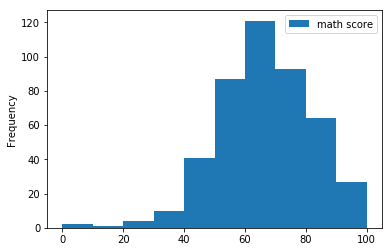

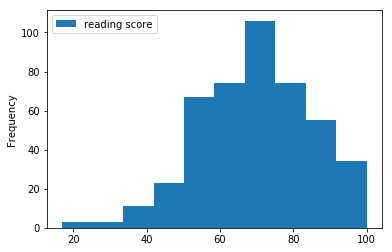

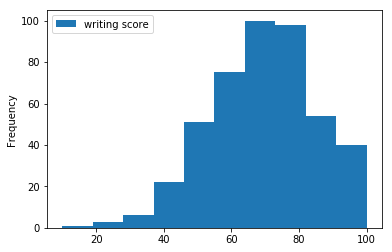

In [323]:
## histogramas
math= population.drop(['reading score', 'writing score','Unnamed: 0'], axis=1)
math.plot.hist()
reading= population.drop(['math score', 'writing score','Unnamed: 0'], axis=1)
reading.plot.hist()
writing= population.drop(['math score', 'reading score','Unnamed: 0'], axis=1)
writing.plot.hist()
plt.show()


#### 3. Describa a la muestra para comparar los resultados. ¿Cuántos individuos hay? ¿Cuánto es la media de notas para cada asignatura? Grafíque un histograma de notas para cadaasignatura.


In [316]:
sample = pd.read_csv('sample.csv')
print("Hay", len(sample), "individuos.")

Hay 45 individuos.


In [328]:
## media
print("Media en matematicas:", np.mean(sample["math score"]))
print("Media en reading:", np.mean(sample["reading score"]))
print("Media en writing:", np.mean(sample["writing score"]))

Media en matematicas: 64.17777777777778
Media en reading: 66.2
Media en writing: 66.11111111111111


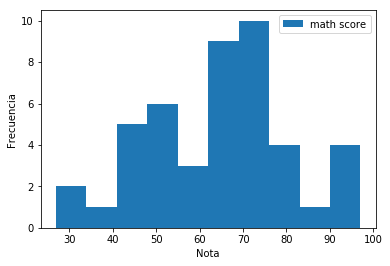

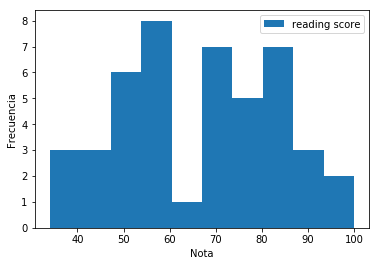

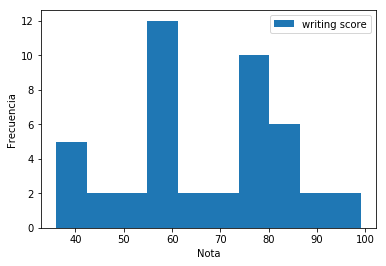

In [339]:
## histogramas
math= sample.drop(['reading score', 'writing score','Unnamed: 0'], axis=1)
math.plot.hist()
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
reading= sample.drop(['math score', 'writing score','Unnamed: 0'], axis=1)
reading.plot.hist()
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
writing= sample.drop(['reading score', 'math score','Unnamed: 0'], axis=1)
writing.plot.hist()
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

#### 4. Determine un valor de R lo suficientemente grande. Para esto usted debe realizar los siguientes pasos para R $\in$ (1, 5, 25, 100, 1000) y usando la asignatura de matemáticas


 - Obtenga la distribución de la media utilizando su algoritmo del item 1.

In [394]:
R = [1, 5, 25, 100, 1000]
medias = []
for i in R:
    medias.append(bootstrap(i, population['math score']))

 - Grafíque la distribución de la media obtenida utilizando un histograma.

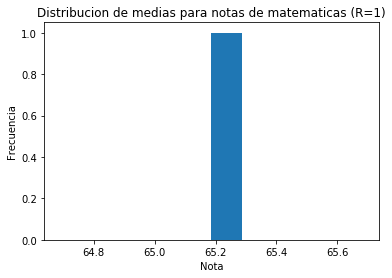

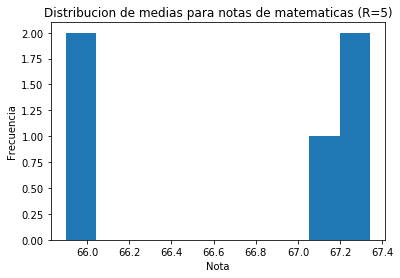

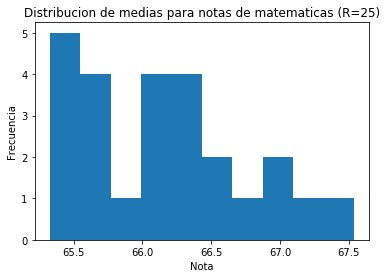

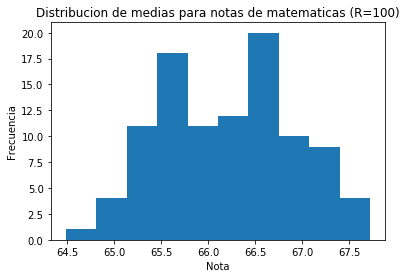

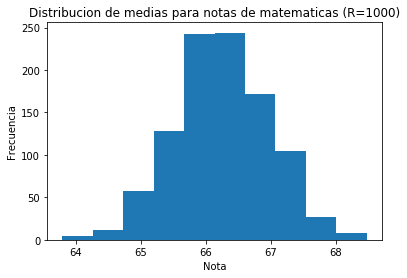

In [395]:
def plotear_media(r, media):
    plt.hist(x=media)
    plt.xlabel('Nota')
    plt.ylabel('Frecuencia')
    plt.title('Distribucion de medias para notas de matematicas (R='+str(r)+")")
    plt.show()

for i in range(len(R)):
    plotear_media(R[i], medias[i])

 - Obtenga el intervalo de confíanza de la media para un valor de confíanza de 90% (los valores de los percentiles 5 y 95).

In [396]:
def IC(confianza,media):
    media2 = sorted(media)
    a = (1-(confianza/100))/2
    P_a = int(len(media2) * a)
    P_b = int(len(media2) * (1-a)) 
    return [media2[P_a], media2[P_b]]

for i in range(len(R)):
    if i == 0:
        print("R = 1, no hay suficiente inf para determinar un IC")
    else:
        print ( "R =",R[i],"Tiene un IC = ",IC(90,medias[i]))

R = 1, no hay suficiente inf para determinar un IC
R = 5 Tiene un IC =  [65.9, 67.34222222222222]
R = 25 Tiene un IC =  [65.38, 67.18666666666667]
R = 100 Tiene un IC =  [65.08666666666667, 67.38444444444444]
R = 1000 Tiene un IC =  [65.03555555555556, 67.45777777777778]


 - Compare con el valor de la media de la población, ¿se encuentra dentro del intervalo?

In [398]:
print("Media de la poblacion:", np.mean(population['math score']))
u = np.mean(population["math score"])
for i in range(len(R)):
    if i == 0:
        print("R = 1, no hay suficiente inf para determinar un IC")
    else:
        if IC(90,medias[i])[0]<u<IC(90,medias[i])[1]:
            print ( "Para R =",R[i],"La media si se encuentra en el intervalo")
        else:
            print ( "Para R =",R[i],"La media no se encuentra en el intervalo")

Media de la poblacion: 66.22
R = 1, no hay suficiente inf para determinar un IC
Para R = 5 La media si se encuentra en el intervalo
Para R = 25 La media si se encuentra en el intervalo
Para R = 100 La media si se encuentra en el intervalo
Para R = 1000 La media si se encuentra en el intervalo


La media real de la población se encuentra en todos los intervalos de todos los R (excepto R=1 por falta de datos).

#### ¿Cómo afecta el valor de R al resultado? ¿Qué valor es conveniente para utilizar bootstrapping?

Mientras mayor es el R, mas exacto es el resultado. 

Dado esto, el mejor R es R=1000. Si se requiriera tiempos mas rapidos de ejecucion, podria usarse R=100 e igual seria aceptable.

#### 5. Para cada uno de las asignaturas, obtenga los intervalos de confíanza para la media utilizando bootstrap para cada uno de los valores de confíanza: 70%, 80%, 90%, 95% y 99%. Comente sus resultados. ¿Concuerdan con los valores de la población? ¿Cómo afecta el valor de confíanza?


In [399]:
ramos = ["math score","reading score","writing score"]
confianza = [70,80,90,95,99]
for i in ramos:
    for j in confianza:
        print ('El IC para',i,'con confianza',j,'=',IC(j,bootstrap(1000, population[i])))

El IC para math score con confianza 70 = [65.49555555555555, 67.01555555555555]
El IC para math score con confianza 80 = [65.26666666666667, 67.18]
El IC para math score con confianza 90 = [65.04888888888888, 67.44]
El IC para math score con confianza 95 = [64.77777777777777, 67.59555555555555]
El IC para math score con confianza 99 = [64.42666666666666, 68.07777777777778]
El IC para reading score con confianza 70 = [69.04, 70.53111111111112]
El IC para reading score con confianza 80 = [68.91111111111111, 70.77333333333333]
El IC para reading score con confianza 90 = [68.56444444444445, 71.0]
El IC para reading score con confianza 95 = [68.31777777777778, 71.29333333333334]
El IC para reading score con confianza 99 = [68.02444444444444, 71.6288888888889]
El IC para writing score con confianza 70 = [68.06222222222222, 69.61777777777777]
El IC para writing score con confianza 80 = [67.88888888888889, 69.74888888888889]
El IC para writing score con confianza 90 = [67.63777777777777, 70.12

Como se observa, en todos los casos el IC contiene a su respectiva media, lo unico que varia es
la distancia que existe entre los extremos y la media, por lo que para una menor confianza se estima un intervalo
mas pequeno que contiene a la media. Cabe destacar que si se usa una confianza muy pequena en conjunto de un
R no lo suficientemente grande, cabe la posibilidad de que la media poblacional se salga de el intervalo.